In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models.model.logistic import Logistic

In [2]:
with open("models/dataset/concat.csv") as f:
    lines = [line.replace("\n", "") for line in f.readlines()]

In [3]:
train = {t[2:]: t[:2] for t in lines[:-100]}
test = {t[2:]: t[:2] for t in lines[-100:]}

train_sents = [k for k in train.keys()]
train_signs = [int(v) for v in train.values()]
test_sents = [k for k in test.keys()]
test_signs = [int(v) for v in test.values()]

In [4]:
model = Logistic(train_sents, train_signs)
model.train()

In [5]:
count = 0
llr_true = []
llr_false = []
llb_true = []
llb_false = []
for t, sign in zip(test_sents, test_signs):
    p = model.predict(t)
    if p[0] == sign:
        count += 1
    if sign == 1 and p[0] == 1:
        llr_true.append(p[2])
    elif sign == 1 and p[0] == -1:
        llr_false.append(p[2])
    elif sign == -1 and p[0] == -1:
        llb_true.append(p[2])
    elif sign == -1 and p[0] == 1:
        llb_false.append(p[2])

In [6]:
print("判定精度:\t" + str(count / len(test_signs)))
print("学習回数:\t" + str(model.t))

判定精度:	0.66
学習回数:	6114


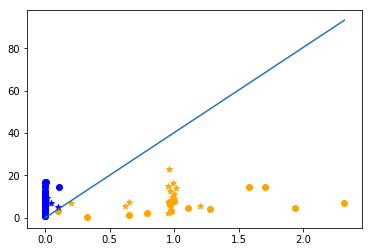

In [7]:
array = np.array(llr_true + llr_false + llb_true + llb_false)
colors = ["orange"] * len(llr_true) + ["blue"] * len(llr_false) + ["blue"] * len(llb_true) + ["orange"] * len(llb_false)
markers = ["o"] * len(llr_true) + ["*"] * len(llr_false) + ["o"] * len(llb_true) + ["*"] * len(llb_false)
for i in range(len(array)):
    plt.scatter(array[i, 0], array[i, 1], c=colors[i], marker=markers[i])
px = np.linspace(np.min(array[:, 0]), np.max(array[:, 0]), 100)
py = -(model.w[0] * px) / model.w[1]
plt.plot(px, py)